In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # library for visualization
import seaborn as sns # library for visualization
import warnings
from tqdm import tqdm
import time
import os

warnings.filterwarnings('ignore')
# pd.set_option('display.max_columns', None)
sns.set_palette('Spectral')
sns.set_context('notebook', font_scale=1)
sns.set_style('whitegrid')

# Commits Status

- commit 1, date 15.11.23 "first commint"
- commit 2, date 15.11.23 "menambahkan latar belakang"
- commit 3, date 15.11.23 "coba untuk tambahkan feature harga beli mobil menggunakan dataset other. namun hasilnya belum memuaskan, masih terlalu banyak yang kosong"
- commit 4, date 16.11.23 "ganti datasets yang lebih relevan"
- commit 5, date 16.11.23 "adding function to set price drop and convert to km"

# Latar Belakang

Belakangan ini, kantor pemerintahan mengadakan anggaran untuk penyewaan kendaraan roda 4. Hal tersebut membuat pihak penyedia perlu untuk menhitung profitable dalam usaha ini. Mereka perlu mendapatkan gambaran harga jual mobil bekas ketika 5 tahun kemudian. Sebagai Data Saintis kita perlu membuat model prediksi yang akurat untuk membantu keputusan investasi kendaraan roda 4.

# ETL 

## E : Extracting Data

In [55]:
# read train and test data
df=pd.read_csv('./datasets/others data/car_data.csv', index_col='Unnamed: 0')

## T : Transforming Data

In [56]:
# transforming test cols name
new_cols=[]
for x in df.columns:
    name='_'.join(x.lower().split())
    new_cols.append(name)
    
df.columns=new_cols

In [57]:
# transforming dataset cars
df['price']=df.price.apply(lambda x: ''.join(x.split('$')[-1].split(',')))
df=df[df.price!='Not Priced']
df['price']=df.price.astype(float)
df['price']=df['price'] * 15000

In [58]:
# retext model without years in the sentence
df['model']=df['model'].apply(lambda x: ' '.join(x.split()[1:]))

In [59]:
# create brand from the first word in model feature
df['brand']=df.model.apply(lambda x: x.split()[0])

In [60]:
df.msrp.unique()

array(['MSRP $49,445', 'Not specified', '$600 price drop', ...,
       'MSRP $43,653', 'MSRP $44,193', 'MSRP $40,761'], dtype=object)

In [61]:
# create function to classification condition car by status
def get_condition_car(x):
    if x == 'New':
        msg = 'New'
    elif x == 'Used':
        msg = 'Secondhand'
    else:
        msg = 'Factory Re-Sell'
    return msg

# apply the function
df['condition']=df.status.apply(get_condition_car)
df=df[['brand','model','year','status','condition','mileage','price','msrp']]

In [62]:
# create function to set price drop by msrp
def get_price_drop(x):
    if x == 'Not specified':
        hasil = 0
    else:
        hasil = ''.join(filter(str.isdigit, x))
    return hasil

df['price drop'] = df['msrp'].apply(get_price_drop)
df['price drop'] = df['price drop'].astype(float)

In [63]:
# create function to convert milleage to km
def get_km(x):
    if x == 'Not available':
        hasil = 0
    else:
        hasil = ''.join(filter(str.isdigit, x))
    return hasil

df['in km'] = df['mileage'].apply(get_km)
df['in km'] = df['in km'].astype(float)

# convert mil to km
km = 1.6
df['in km'] = df['in km'] * km

## L : Loading Data

# Exploratory Data Analyst

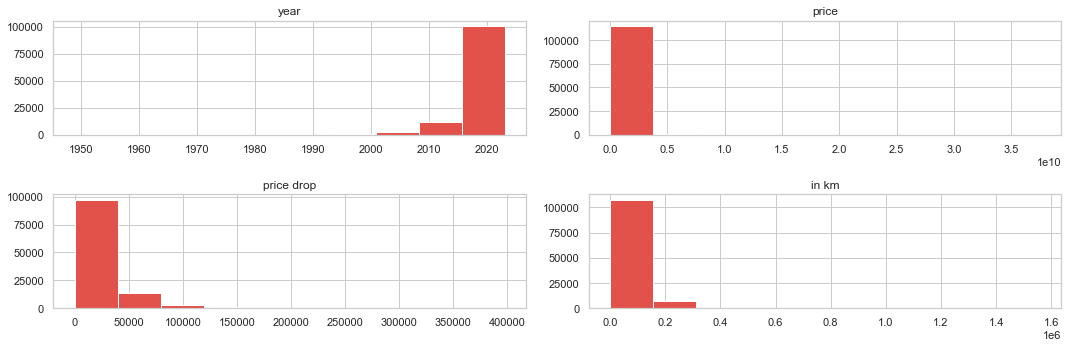

In [64]:
df.hist(figsize=(15,5))
plt.tight_layout()
plt.show()

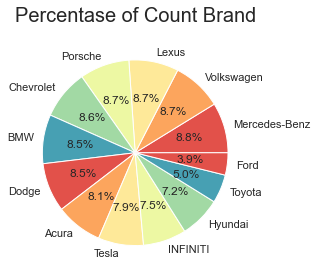

In [65]:
# show percentase of count brand from dataset
plt.title('Percentase of Count Brand', fontsize=20, pad=15)
plt.pie(df.brand.value_counts(), autopct='%.1f%%', labels=df.brand.value_counts().index.tolist())
plt.tight_layout()
plt.show()

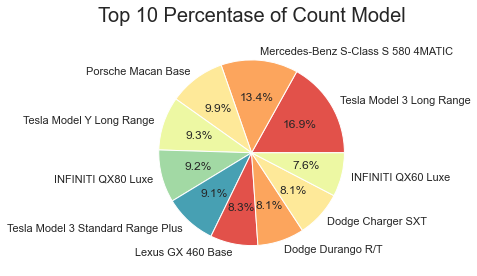

In [66]:
# show top 10 percentase of count model from dataset
plt.title('Top 10 Percentase of Count Model', fontsize=20, pad=15)
plt.pie(df.model.value_counts().head(10), autopct='%.1f%%', labels=df.model.value_counts().head(10).index.tolist())
plt.tight_layout()
plt.show()

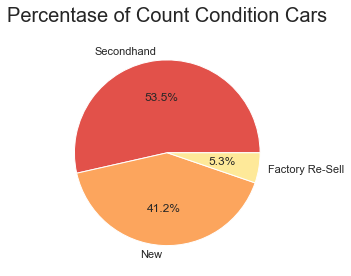

In [67]:
# show top 10 percentase of count model from dataset
plt.title('Percentase of Count Condition Cars', fontsize=20, pad=15)
plt.pie(df.condition.value_counts().head(10), autopct='%.1f%%', labels=df.condition.value_counts().head(10).index.tolist())
plt.tight_layout()
plt.show()

In [68]:
df

,brand,model,year,status,condition,mileage,price,msrp,price drop,in km
0,Acura,Acura TLX A-Spec,2022,New,New,Not available,741675000.0,"MSRP $49,445",49445.0,0.0
1,Acura,Acura RDX A-Spec,2023,New,New,Not available,763425000.0,Not specified,0.0,0.0
2,Acura,Acura TLX Type S,2023,New,New,Not available,866175000.0,Not specified,0.0,0.0
3,Acura,Acura TLX Type S,2023,New,New,Not available,863175000.0,Not specified,0.0,0.0
4,Acura,Acura MDX Sport Hybrid 3.0L w/Technology Package,2019,Used,Secondhand,"32,675 mi.",614850000.0,$600 price drop,600.0,52280.0
...,...,...,...,...,...,...,...,...,...,...
10005,Volkswagen,Volkswagen Atlas 3.6L SE w/Technology,2023,New,New,Not available,710190000.0,Not specified,0.0,0.0
10006,Volkswagen,Volkswagen Taos 1.5T SE,2023,New,New,Not available,463425000.0,Not specified,0.0,0.0
10007,Volkswagen,Volkswagen Beetle,2012,Used,Secondhand,"100,395 mi.",149910000.0,$252 price drop,252.0,160632.0
10008,Volkswagen,Volkswagen ID.4 Pro S,2022,New,New,Not available,788775000.0,Not specified,0.0,0.0
